In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import glob
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.neural_network import MLPClassifier


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Concatenando arquivos .csv

In [53]:

file_path = '/content/drive/MyDrive/Covid/lbp-train-fold_*.csv'

all_data = pd.concat([pd.read_csv(f) for f in glob.glob(file_path)], ignore_index=True)

print(all_data)


     attribute1  attribute2  attribute3  attribute4  attribute5  attribute6  \
0      0.092297    0.016924    0.004955    0.005389    0.014471    0.004903   
1      0.062245    0.014448    0.004115    0.007678    0.012547    0.006649   
2      0.073720    0.015105    0.004634    0.006960    0.012996    0.006098   
3      0.078099    0.014243    0.005055    0.006548    0.013168    0.005589   
4      0.079866    0.015478    0.005096    0.006914    0.012401    0.005805   
..          ...         ...         ...         ...         ...         ...   
797    0.050528    0.013387    0.003475    0.008724    0.008988    0.006716   
798    0.030330    0.010346    0.002754    0.006810    0.006140    0.002977   
799    0.052310    0.014503    0.002366    0.006664    0.012790    0.005812   
800    0.032502    0.010679    0.003675    0.007988    0.007782    0.007058   
801    0.059928    0.011245    0.005253    0.008173    0.012218    0.007842   

     attribute7  attribute8  attribute9  attribute1

# Contando Ocorrencia de classes

In [54]:
class_counts = all_data['class'].value_counts()

print(class_counts)


class
R/Normal                                            700
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19     63
R/Pneumonia/Celullar/Bacterial/Streptococcus          9
R/Pneumonia/Acellular/Viral/Coronavirus/SARS          8
R/Pneumonia/Celullar/Fungus/Pneumocystis              8
R/Pneumonia/Acellular/Viral/Coronavirus/MERS          7
R/Pneumonia/Acellular/Viral/Varicella                 7
Name: count, dtype: int64


# Oversampling para balancear

In [55]:
from imblearn.over_sampling import SMOTE

X = all_data.drop(columns=['class'])
y = all_data['class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

print(balanced_data['class'].value_counts())


class
R/Normal                                            700
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19    700
R/Pneumonia/Acellular/Viral/Coronavirus/MERS        700
R/Pneumonia/Acellular/Viral/Coronavirus/SARS        700
R/Pneumonia/Acellular/Viral/Varicella               700
R/Pneumonia/Celullar/Bacterial/Streptococcus        700
R/Pneumonia/Celullar/Fungus/Pneumocystis            700
Name: count, dtype: int64


# Treinando MLP


In [86]:
X = balanced_data.drop(columns=['class'])
y = balanced_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # Ajuste os parâmetros conforme necessário
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.9795918367346939
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       0.97      0.97      0.97       153
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.98      0.91      0.94       140
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       0.99      1.00      0.99       139
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       1.00      1.00      1.00       139
           R/Pneumonia/Acellular/Viral/Varicella       0.96      1.00      0.98       120
    R/Pneumonia/Celullar/Bacterial/Streptococcus       0.99      1.00      0.99       147
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.98      0.99      0.98       142

                                        accuracy                           0.98       980
                                       macro avg       0.98      0.98      0.98       980
                                    weighted 

# Validação base de teste

Accuracy: 0.935672514619883
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       0.98      1.00      0.99       300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.71      0.56      0.62        27
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       0.38      1.00      0.55         3
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       0.50      0.33      0.40         3
           R/Pneumonia/Acellular/Viral/Varicella       0.00      0.00      0.00         3
    R/Pneumonia/Celullar/Bacterial/Streptococcus       0.50      0.33      0.40         3
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.00      0.00      0.00         3

                                        accuracy                           0.94       342
                                       macro avg       0.44      0.46      0.42       342
                                    weighted a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


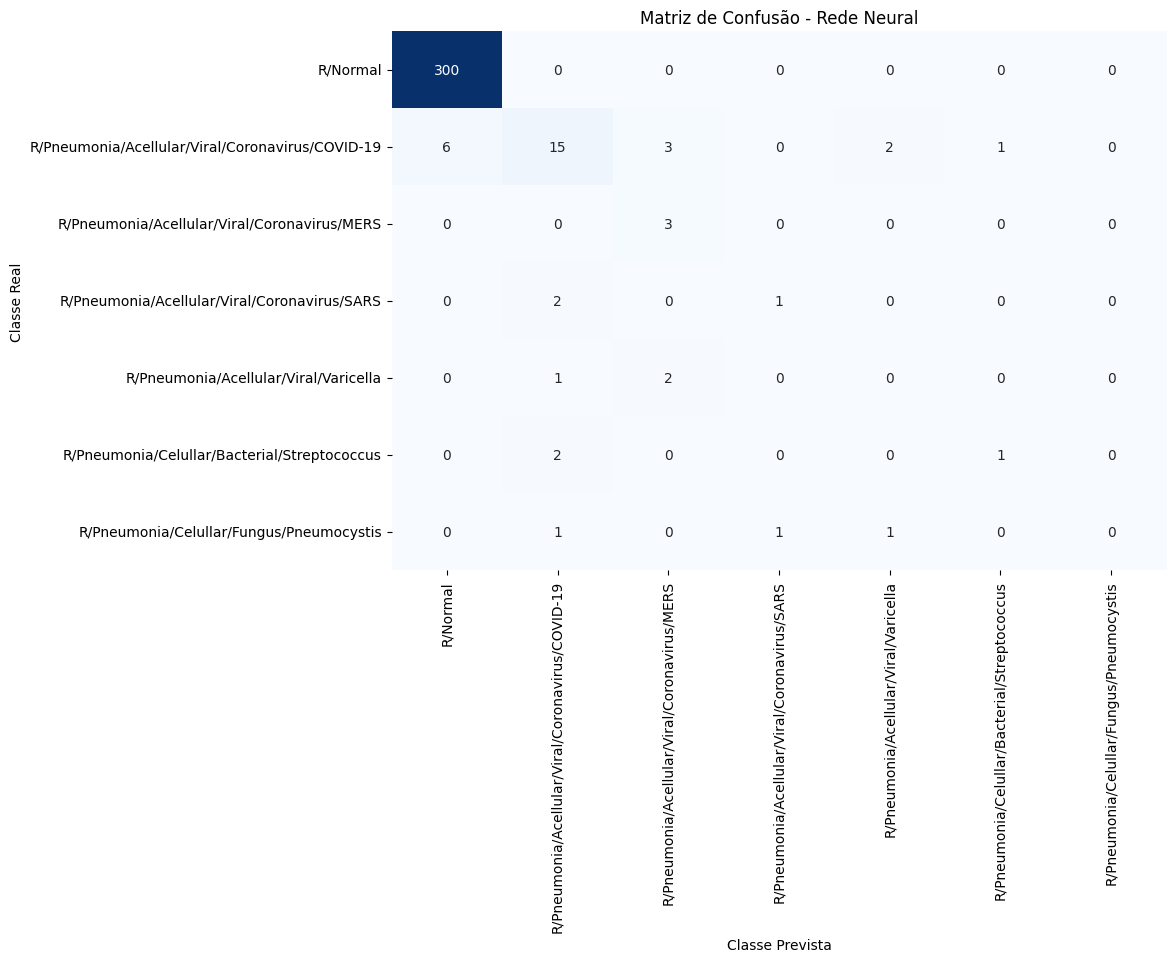

In [87]:
X_train = balanced_data.drop(columns=['class'])
y_train = balanced_data['class']

test_data = pd.read_csv('/content/drive/MyDrive/Covid/lbp-test.csv')
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=mlp_model.classes_, columns=mlp_model.classes_)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)

plt.title('Matriz de Confusão - Rede Neural')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

# Validação base de treino  0

Accuracy: 1.0
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       1.00      1.00      1.00       140
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       1.00      1.00      1.00        13
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       1.00      1.00      1.00         2
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       1.00      1.00      1.00         2
           R/Pneumonia/Acellular/Viral/Varicella       1.00      1.00      1.00         2
    R/Pneumonia/Celullar/Bacterial/Streptococcus       1.00      1.00      1.00         2
        R/Pneumonia/Celullar/Fungus/Pneumocystis       1.00      1.00      1.00         2

                                        accuracy                           1.00       163
                                       macro avg       1.00      1.00      1.00       163
                                    weighted avg       1.00 

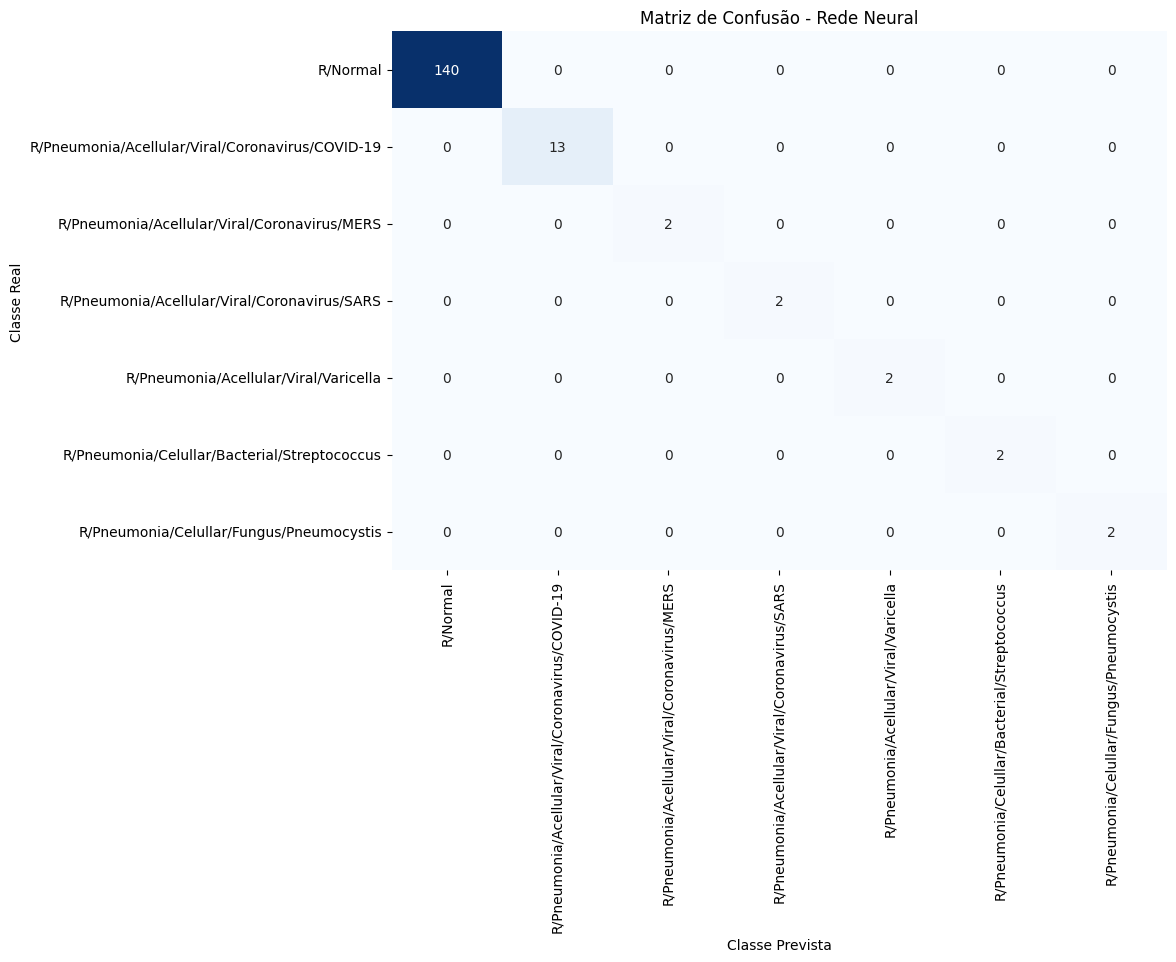

In [88]:
X_train = balanced_data.drop(columns=['class'])
y_train = balanced_data['class']

test_data = pd.read_csv('/content/drive/MyDrive/Covid/lbp-train-fold_0.csv')
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=mlp_model.classes_, columns=mlp_model.classes_)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)

plt.title('Matriz de Confusão - Rede Neural')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

# Validação base de treino 4


Accuracy: 1.0
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       1.00      1.00      1.00       140
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       1.00      1.00      1.00        12
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       1.00      1.00      1.00         1
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       1.00      1.00      1.00         1
           R/Pneumonia/Acellular/Viral/Varicella       1.00      1.00      1.00         1
    R/Pneumonia/Celullar/Bacterial/Streptococcus       1.00      1.00      1.00         1
        R/Pneumonia/Celullar/Fungus/Pneumocystis       1.00      1.00      1.00         1

                                        accuracy                           1.00       157
                                       macro avg       1.00      1.00      1.00       157
                                    weighted avg       1.00 

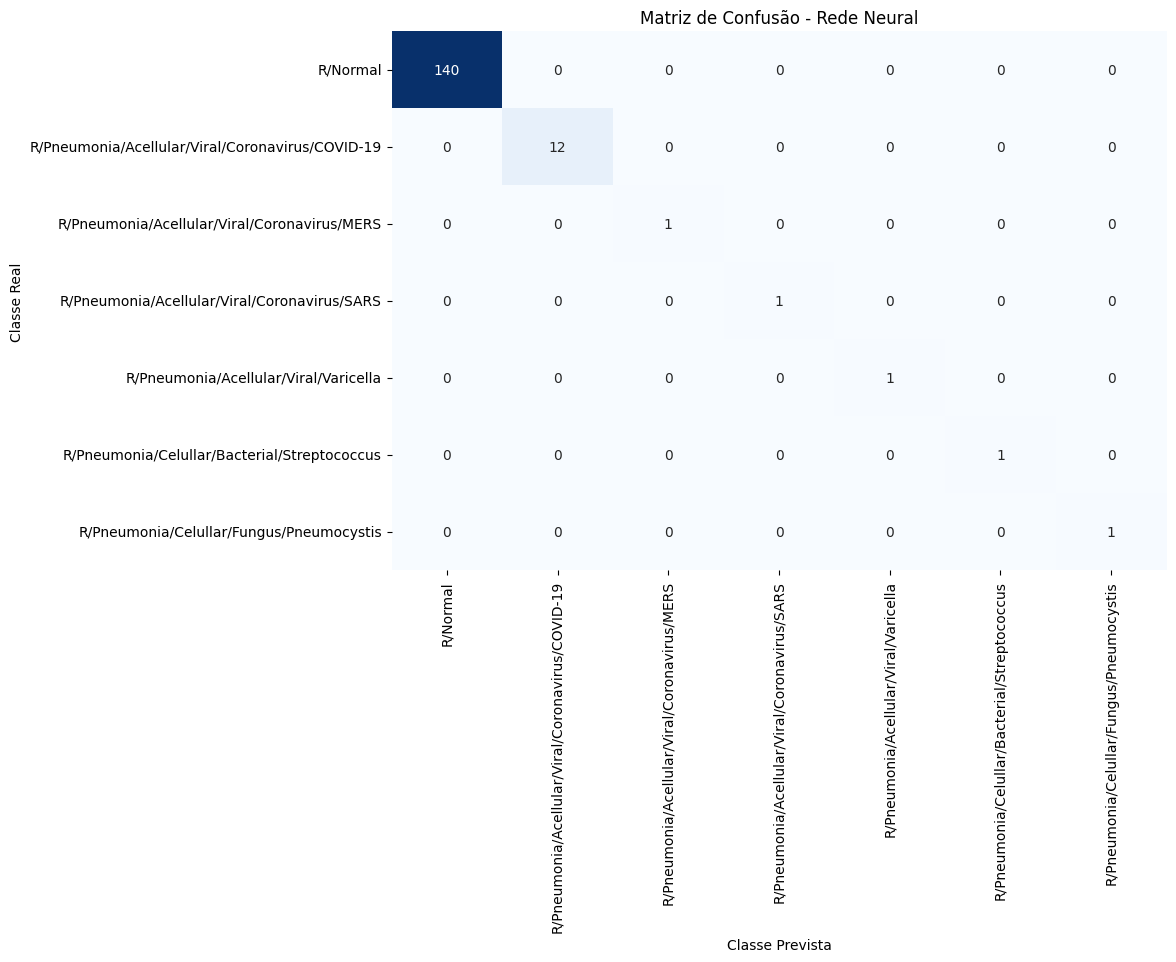

In [90]:
X_train = balanced_data.drop(columns=['class'])
y_train = balanced_data['class']

test_data = pd.read_csv('/content/drive/MyDrive/Covid/lbp-train-fold_4.csv')
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=mlp_model.classes_, columns=mlp_model.classes_)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)

plt.title('Matriz de Confusão - Rede Neural')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

# Treinamento KNN


In [102]:
X = balanced_data.drop(columns=['class'])
y = balanced_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9959183673469387
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       0.99      0.99      0.99       153
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       1.00      0.99      1.00       140
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       1.00      1.00      1.00       139
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       1.00      1.00      1.00       139
           R/Pneumonia/Acellular/Viral/Varicella       0.98      1.00      0.99       120
    R/Pneumonia/Celullar/Bacterial/Streptococcus       1.00      1.00      1.00       147
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.99      0.99      0.99       142

                                        accuracy                           1.00       980
                                       macro avg       1.00      1.00      1.00       980
                                    weighted 

# Validação Teste


Accuracy: 0.9093567251461988
Classification Report:
                                                   precision    recall  f1-score   support

                                        R/Normal       0.97      0.98      0.98       300
R/Pneumonia/Acellular/Viral/Coronavirus/COVID-19       0.59      0.48      0.53        27
    R/Pneumonia/Acellular/Viral/Coronavirus/MERS       0.67      0.67      0.67         3
    R/Pneumonia/Acellular/Viral/Coronavirus/SARS       0.00      0.00      0.00         3
           R/Pneumonia/Acellular/Viral/Varicella       0.14      0.33      0.20         3
    R/Pneumonia/Celullar/Bacterial/Streptococcus       0.50      0.33      0.40         3
        R/Pneumonia/Celullar/Fungus/Pneumocystis       0.00      0.00      0.00         3

                                        accuracy                           0.91       342
                                       macro avg       0.41      0.40      0.40       342
                                    weighted 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


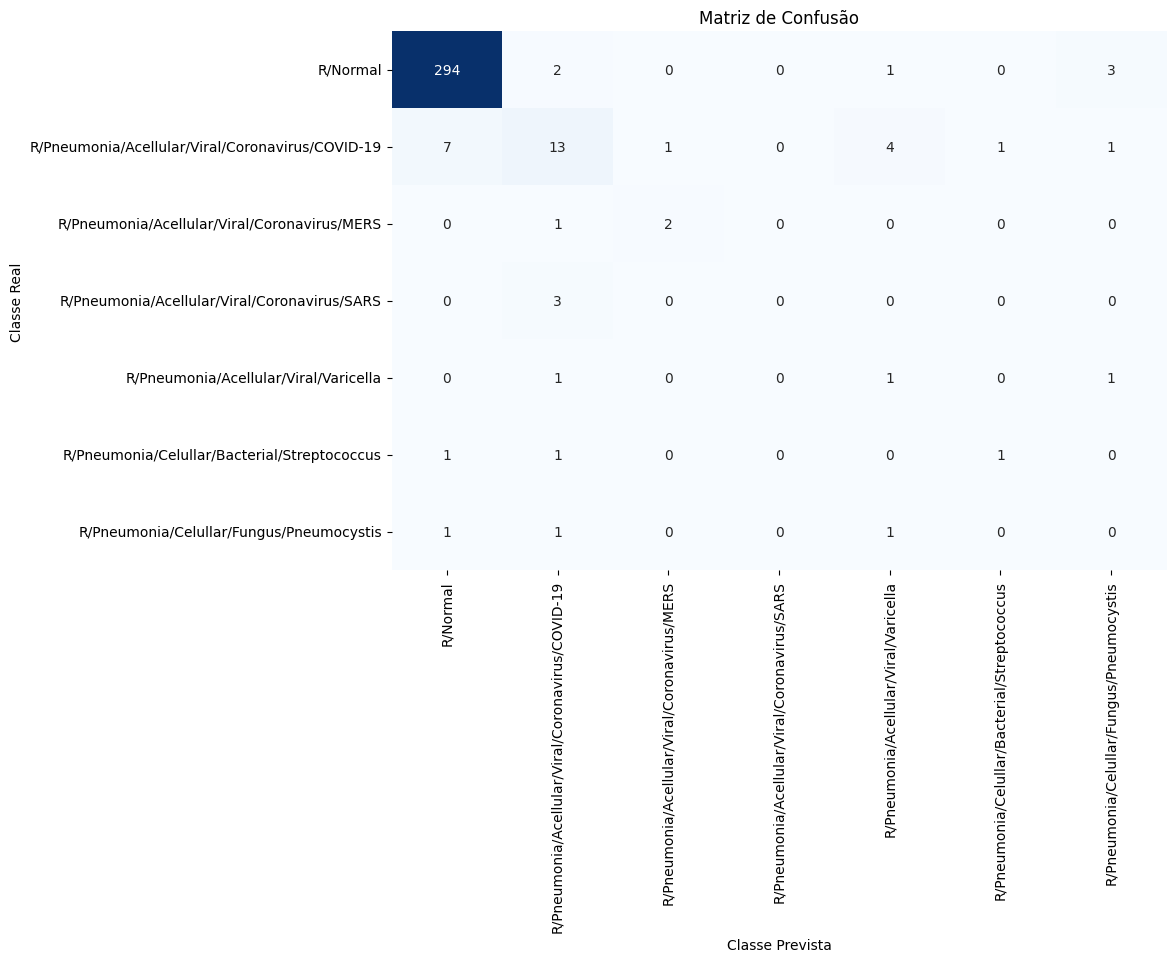

In [103]:
X_train = balanced_data.drop(columns=['class'])
y_train = balanced_data['class']

test_data = pd.read_csv('/content/drive/MyDrive/Covid/lbp-test.csv')
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)

plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()